### Exercise - 9

In [134]:
import pandas as pd
import numpy as np
from apyori import apriori

In [117]:
df = pd.read_csv('Groceries.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
trans = []
for i in range(7501):
    trans.append(
        [df.values[i,j] for j in range(20) if df.values[i,j] is not np.nan])

In [132]:
rules = apriori(transactions=trans,min_support=0.0045,min_confidence=0.3,min_lift=3,max_length=2)
association_rules = list(rules)

In [133]:
for item in association_rules:
    items = [x for x in item[0]]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: ground beef -> herb & pepper
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: ground beef -> tomato sauce
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896


### Exercise - 10

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [7]:
tab = pd.crosstab(df['sex'],df['time'])
print(tab)
chi2,p,dof,expected = stats.chi2_contingency(tab)
print('Chi-Square Value :',round(chi2,5))
print('P Value :',round(p,5))
print('Relation') if p <= 0.05 else print('No Relation')

time    Dinner  Lunch
sex                  
Female      52     35
Male       124     33
Chi-Square Value : 9.34381
P Value : 0.00224
Relation


### Exercise - 15

In [41]:
from scipy.spatial import distance_matrix
import numpy as np


def GetMatrix(text, metric):
    rows = text.split('\n')
    rows = [row.strip() for row in rows if row.strip() != '']
    mat = [list(map(int, row.split(' '))) for row in rows]
    dist_mat = distance_matrix(mat, mat, p=metric)
    dist_mat = np.round(np.matrix(dist_mat), 2)
    return dist_mat

In [42]:
print('-------Metrics-------')
print('1. Manhattan Distance')
print('2. Euclidean Distance')
print('3. Mahalanobis Distance')


text = '''
        1 2 3
        4 5 6
        7 8 9
        1 4 5
       '''
metirc = int(input('Enter Metric : '))
print(GetMatrix(text, metirc))

-------Metrics-------
1. Manhattan Distance
2. Euclidean Distance
3. Mahalanobis Distance
Enter Metric : 2
[[ 0.    5.2  10.39  2.83]
 [ 5.2   0.    5.2   3.32]
 [10.39  5.2   0.    8.25]
 [ 2.83  3.32  8.25  0.  ]]


### Exercise - 16

In [51]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Students enrolled in different courses')

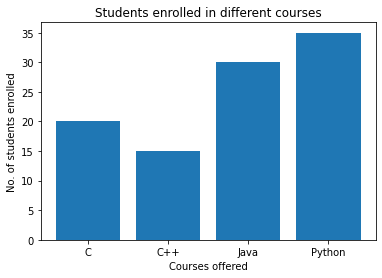

In [44]:
data = {'C':20, 'C++':15, 'Java':30,'Python':35}
courses = list(data.keys())
values = list(data.values())

plt.bar(courses,values)
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")

Text(0.5, 1.0, 'Students enrolled in different courses')

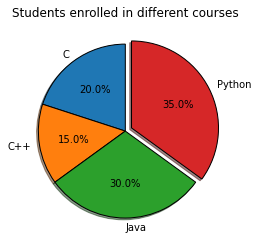

In [45]:
data = {'C':20, 'C++':15, 'Java':30,'Python':35}
labels = list(data.keys())
slices = list(data.values())
explode = [0, 0, 0, 0.08]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title("Students enrolled in different courses")

Text(0.5, 1.0, 'Sample Histogram')

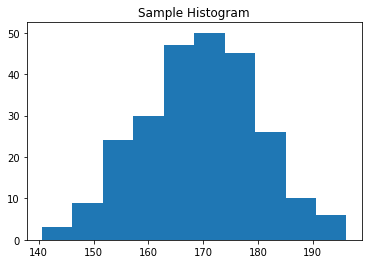

In [46]:
data =  np.random.normal(170, 10, 250)
plt.hist(data)
plt.title("Sample Histogram")

Text(0.5, 1.0, 'Scatter Plot')

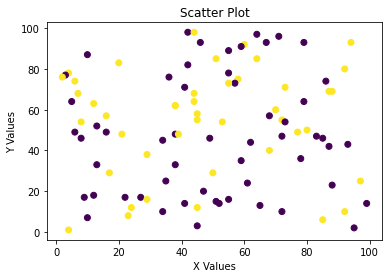

In [47]:
x = np.random.randint(1,100,size=(100,))
y = np.random.randint(1,100,size=(100,))
labels = np.random.randint(0,2,size=(100,))
                           
plt.scatter(x,y,c=labels)
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot")

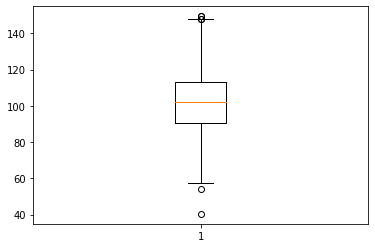

In [50]:
np.random.seed(10)
data = np.random.normal(100, 20, 200)
plt.boxplot(data);